# **Statistical comparison of k-NN algorithm and MLP Classifier**
## Subproject "_ANNs applied in Images_" (Machine Learning) of UFES/Alegre & UFOPA
### **Author**: Eduardo Destefani Stefanato, on 10/27/2021

The presentation consisted of training the MLPClassifier and k-NN with chosen parameters, through 10-fold CV (Cross-Validation). With the values obtained from the CV, the Wilcoxon test for unpaired results (TSoPW; sum of unpaired ranks/data) was applied.

_____________________________

### **Dataset used**: [Titanic](https://www.kaggle.com/pavlofesenko/titanic-extendedhttps://www.kaggle.com/pavlofesenko/titanic-extended)

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this challenge, we ask you to build a predictive model that answers the question: **"what sorts of people were more likely to survive?"** using passenger data, such as:

- name;
- age;
- gender;
- socio-economic class;
- etc.

Fonte: [kaggle.com](https://www.kaggle.com/c/titanic)

In [1]:
# Data sat
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import SystemRandom, choice
from IPython.display import Image
from IPython.core.display import HTML 
warnings.filterwarnings("ignore")
%matplotlib inline

## Exploratory Data Analysis

In this step, we will export the data and then determine which are the most important predictor variables to determine if the person is a survivor or not.

In [2]:
data = pd.read_csv('Data/titanic.csv'); data = data.drop(columns=['Name_wiki', 'Age_wiki', 'Class']).copy(); data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Hometown,Boarded,Destination,Lifeboat,Body
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"London, England",Southampton,New York City,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN


In [3]:
df = data.drop(columns=['PassengerId', 'Ticket', 'Cabin', 'Hometown', 'Destination', 'Lifeboat', 'Body'])
df['Title'] = df['Name'].apply(lambda t: t.split(',')[1].split('.')[0].strip()); df = df.drop(columns='Name')
df.dropna(inplace=True)
# df.Age.fillna(round(np.mean(df['Age'].fillna(0)))) - (80%)
# df['Fare'] = df.Fare.fillna(round(np.mean(df['Fare'].fillna(0)))); df['WikiId'] = df.WikiId.fillna(round(np.mean(df['WikiId'].fillna(0))))

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Embarked'] = le.fit_transform(df.Embarked) # turn your features into numeric categoricals
df['Sex'] = le.fit_transform(df.Sex) # turn your features into numeric categoricals
df['Boarded'] = le.fit_transform(df.Boarded)

# df['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# df['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
df['Title'] = le.fit_transform(df.Title); df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Boarded,Title
0,0.0,3,1,22.0,1,0,7.2500,2,691.0,3,11
1,1.0,1,0,38.0,1,0,71.2833,0,90.0,1,12
2,1.0,3,0,26.0,0,0,7.9250,2,865.0,3,8
3,1.0,1,0,35.0,1,0,53.1000,2,127.0,3,12
4,0.0,3,1,35.0,0,0,8.0500,2,627.0,3,11
...,...,...,...,...,...,...,...,...,...,...,...
885,0.0,3,0,39.0,0,5,29.1250,1,1146.0,2,12
886,0.0,2,1,27.0,0,0,13.0000,2,514.0,3,14
887,1.0,1,0,19.0,0,0,30.0000,2,137.0,3,8
889,1.0,1,1,26.0,0,0,30.0000,0,28.0,1,11


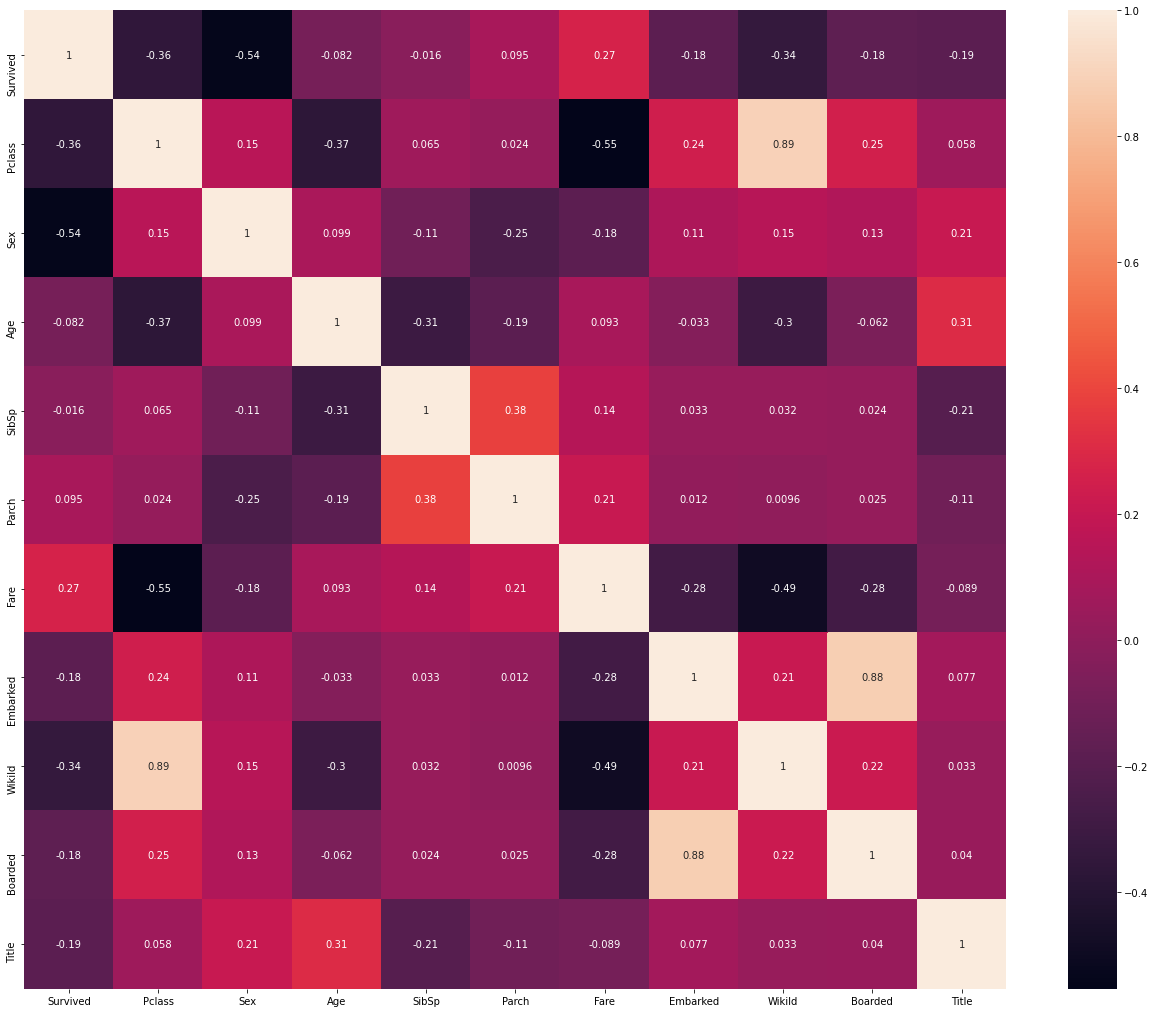

In [4]:
plt.subplots(figsize=(22, 18)); sns.heatmap(df.corr(), annot=True)
plt.show()

## Variables definition 

We can see at the heatmap that the variables with more correlation with Survived are; **WikiId**, **Fare**, **Sex**, **Pclass**, **Title**, **Boarded**, **Embarked**. Therefor, the predict variables are:

- WikiId
- Fare
- Sex
- Pclass
- Title
- Boarded
- Embarked

The variable target:

- Survived

In [5]:
# declaring the variables and evaluation parameters
df_model = df.drop(columns=['SibSp', 'Parch', 'Age'])

X = df_model.drop(columns=['Survived']).values # predict variables
y = np.array(df_model.Survived, dtype=int) # variable target

key_random = SystemRandom()
seed_k = key_random.randint(0, 45)
seed_e = key_random.randint(0, 45)

from sklearn.model_selection import cross_validate, KFold, cross_val_score
# Determining the CV
kfold_k = KFold(n_splits=10, shuffle=True, random_state = seed_k)
kfold_e = KFold(n_splits=10, shuffle=True, random_state = seed_e)
print('seed_k: %d | seed_e: %d'%(seed_k, seed_e))

seed_k: 41 | seed_e: 7


## k-NN (k-Nearest Neighbors)

Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples (ALI, 2020).

In [6]:
from sklearn.neighbors import KNeighborsClassifier # k-NN

# k-scores
lst_k_score = []; dict_score = {}
lst_k = list(range(1, 42))
for k in lst_k:
    knn = KNeighborsClassifier(n_neighbors = k)
    score = cross_val_score(knn, X, y, cv = kfold_k, scoring = 'f1_macro')
    dict_score['k = %d'%k] = score
    lst_k_score.append([np.mean(score), np.std(score)])
for i, k in enumerate(lst_k[:10]):
    print('# k = {} result: ({} ± {})'.format(k, round(lst_k_score[i][0], 3), round(lst_k_score[i][1], 3)))
df_k_score = pd.DataFrame(dict_score)

# k = 1 result: (0.594 ± 0.053)
# k = 2 result: (0.543 ± 0.064)
# k = 3 result: (0.608 ± 0.062)
# k = 4 result: (0.572 ± 0.07)
# k = 5 result: (0.612 ± 0.055)
# k = 6 result: (0.614 ± 0.06)
# k = 7 result: (0.641 ± 0.046)
# k = 8 result: (0.622 ± 0.063)
# k = 9 result: (0.654 ± 0.063)
# k = 10 result: (0.653 ± 0.062)


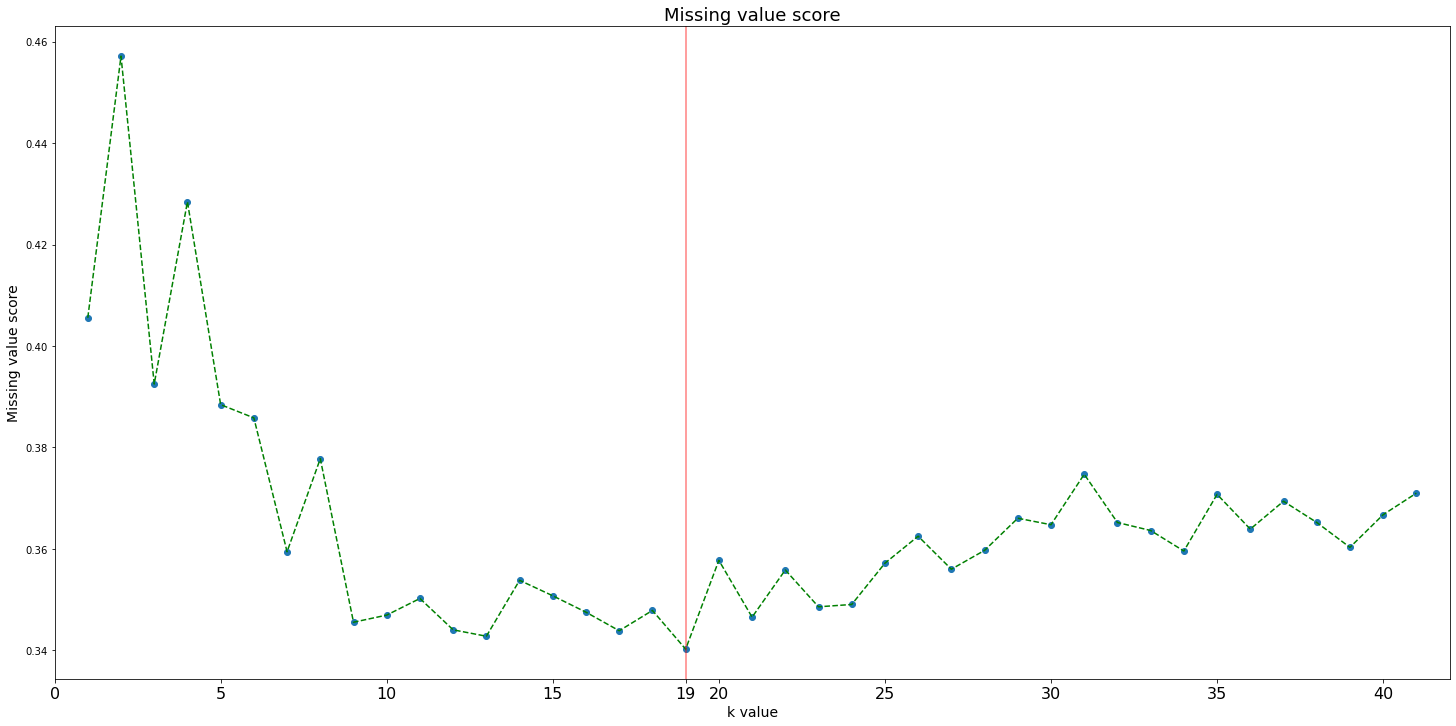

In [7]:
ky = [1 - i[0] for i in lst_k_score]
kx = lst_k
plt.subplots(figsize=(25, 12))
plt.title('Missing value score', fontsize = 18)
plt.plot(kx, ky, '--', color = 'green')
plt.scatter(kx, ky)
plt.xlabel('k value', fontsize = 14)
plt.xticks(list(plt.xticks()[0]) + [kx[ky.index(min(ky))]],fontsize = 16)
plt.xlim(left=0, right=42)
plt.ylabel('Missing value score', fontsize = 14)
plt.axvline(kx[ky.index(min(ky))], color = 'red', alpha = 0.5)
plt.show()

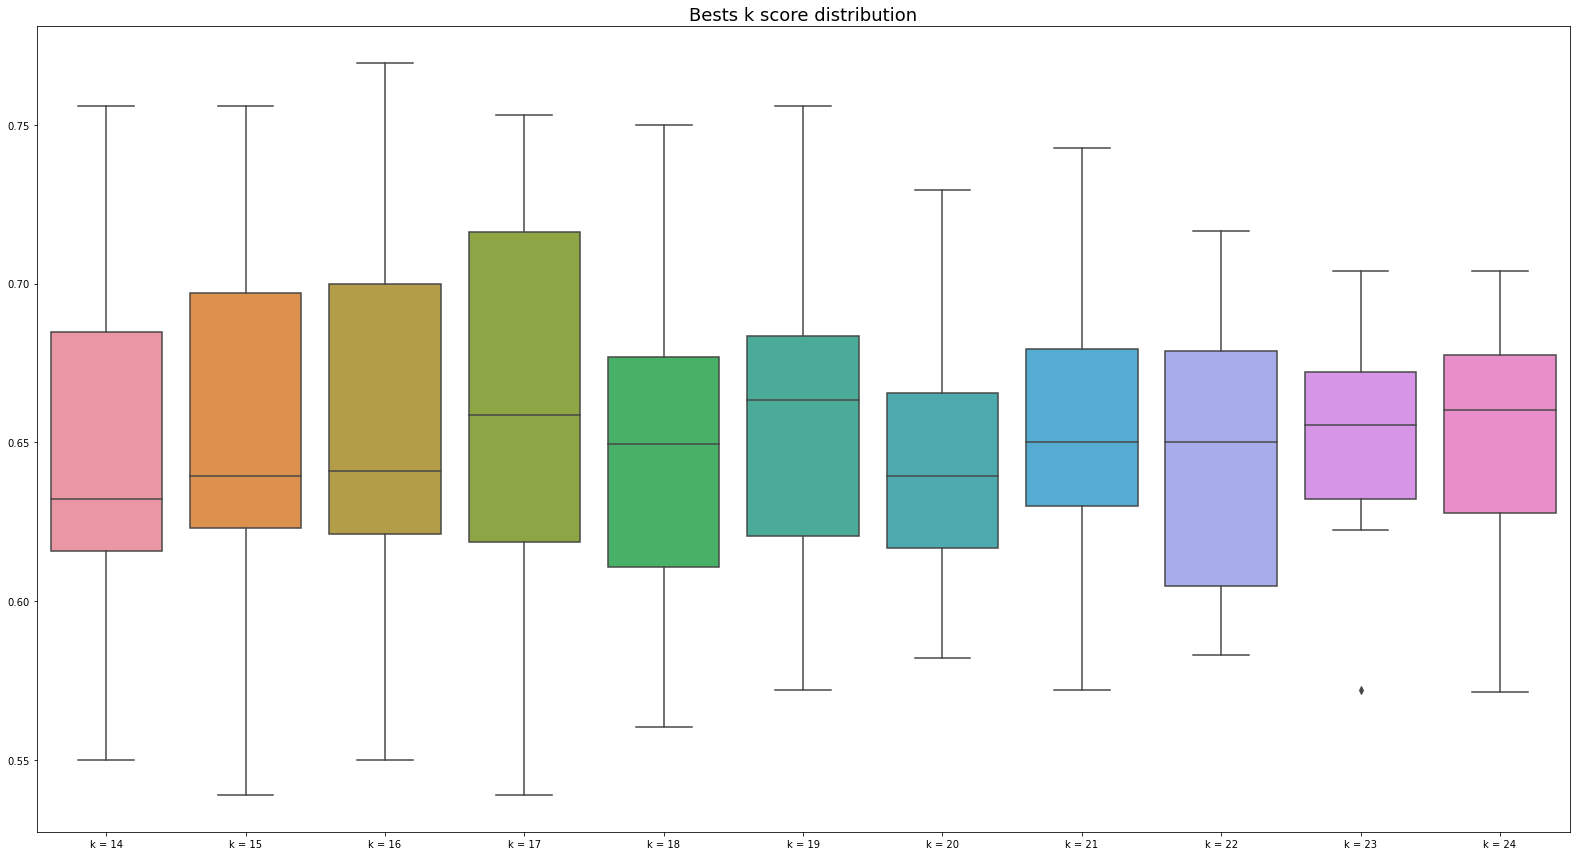

In [8]:
k_ref = kx[ky.index(min(ky))]
plt.subplots(figsize=(22, 12))
if k_ref == max(kx):
    df_k_sig = df_k_score.drop(columns=['k = %d'%k for k in lst_k if k < k_ref - 11])
if k_ref == min(kx):
    df_k_sig = df_k_score.drop(columns=['k = %d'%k for k in lst_k if k < k_ref + 11])
else:
    df_k_sig = df_k_score.drop(columns=['k = %d'%k for k in lst_k if k < k_ref - 5 or k > k_ref + 5])
plt.title('Bests k score distribution', fontsize=18)
sns.boxplot(data=df_k_sig)
plt.tight_layout()
plt.show()

### Choosing the best $k$
_______________________________________________
Looking at the distributions, we have a possible statistical difference between the k-scores. To make sure of this, we used the Kruskal-Wallis test between groups

In [9]:
from scipy.stats.mstats import kruskal
try:
    kw_all = kruskal([df_k_sig['k = %d'%k].values for k in lst_k[lst_k.index(k_ref - 5):lst_k.index(k_ref + 5)]])
except:
    if lst_k.index(k_ref) == 0:
        kw_all = kruskal([df_k_sig['k = %d'%k].values for k in lst_k[lst_k.index(k_ref):lst_k.index(k_ref + 10)]])
    else:
        kw_all = kruskal([df_k_sig['k = %d'%k].values for k in lst_k[-10:]])
print('# P-value between all groups: {}'. format(round(kw_all[1], 2)))

# P-value between all groups: 1.0


Therefore, we can declare a range of the best values for the neighborhood. Then:

In [10]:
range_best_k = lst_k[lst_k.index(k_ref - 5):lst_k.index(k_ref + 5) + 1]
print('{} ≤ k ≤ {}'.format(range_best_k[0], range_best_k[-1]))

14 ≤ k ≤ 24


## MLP (Multi-layer Perceptron classifier)

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot) = R^m \to R^°$ trained from a data set, where $m$ is the number of dimensions for input (dimension of training data) and $o$ is the number of dimensions for output (target variable). It can learn a nonlinear function approximation during classification or even regression. Its name comes from the layers between input and output, called hidden layers that are non-linear. Figure 1 shows a hidden layer MLP with scalar output ([SCIKITLEARN](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips), 2021).


To choose the parameters, we test the accuracy of the network on a test dataset. If the accuracy is less than optimal, change one or more parameters of the network topology and start over. (ROIGER, 2017)

                         
`MLPClassifier(hidden_layer_sizes = (n_l1, n_l2, n_l3), max_iter = epochs)`

In [11]:
Image(url= "https://scikit-learn.org/stable/_images/multilayerperceptron_network.png")

The MLPClassifier implements a multilayer perceptron (MLP) algorithm that trains using **Backpropagation**. MLPClassifier trains iteratively, since at each time step the partial derivatives of the **loss function** in relation to the model parameters are calculated to update the parameters, trying to minimize the loss function as much as possible. ([SCIKITLEARN](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips), 2021).

In [12]:
from sklearn.neural_network import MLPClassifier #MLP
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)

lst_e_score = []; dict_score_win = {}
lst_e = list(range(200, 2200, 200)); lst_layer = [(12,), (9,3,), (6,3,3)]
for l in lst_layer:
    layer_size = l
    for e in lst_e:
        MLP = MLPClassifier(hidden_layer_sizes = layer_size, max_iter = e)
        score = cross_val_score(MLP, Xs, y, cv = kfold_e, scoring = 'f1_macro')
        if l == lst_layer[1]:
            dict_score_win['e = %d'%e] = score 
        lst_e_score.append([np.mean(score), np.std(score)])

lst_e_score_l1 = lst_e_score[0:10]; dict_score_l = {}
dict_score_l['l1'] = [i[0] for i in lst_e_score_l1]

lst_e_score_l2 = lst_e_score[10:20];
dict_score_l['l2'] = [i[0] for i in lst_e_score_l2]

lst_e_score_l3 = lst_e_score[20:30];
dict_score_l['l3'] = [i[0] for i in lst_e_score_l3]

# df_mlp_score = pd.DataFrame(dict_score)
df_mlp_layer_score = pd.DataFrame(dict_score_l)

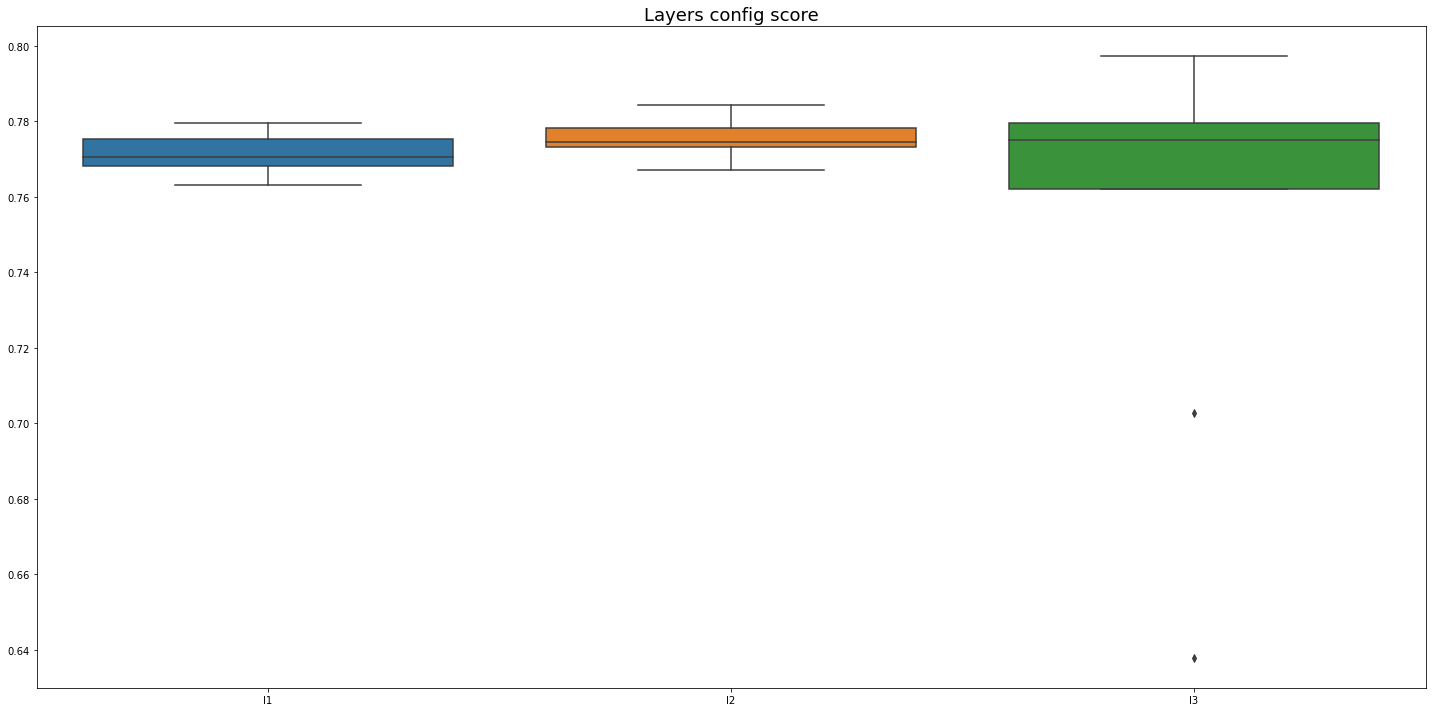

In [13]:
plt.subplots(figsize=(20, 10))
sns.boxplot(data=df_mlp_layer_score)
plt.title('Layers config score', fontsize = 18)
plt.tight_layout()
plt.show()

In [14]:
kw_all = kruskal(df_mlp_layer_score['l1'].values, df_mlp_layer_score['l2'].values, df_mlp_layer_score['l3'].values)
print('# P-value between all groups: {}'. format(round(kw_all[1], 2)))

# P-value between all groups: 0.36


The chosen parameter for the size of hidden layers was **(9, 3,)**

### Analyzing the epochs of the second layer configuration
_________________________________
Analyzing the best epoch based on scores.

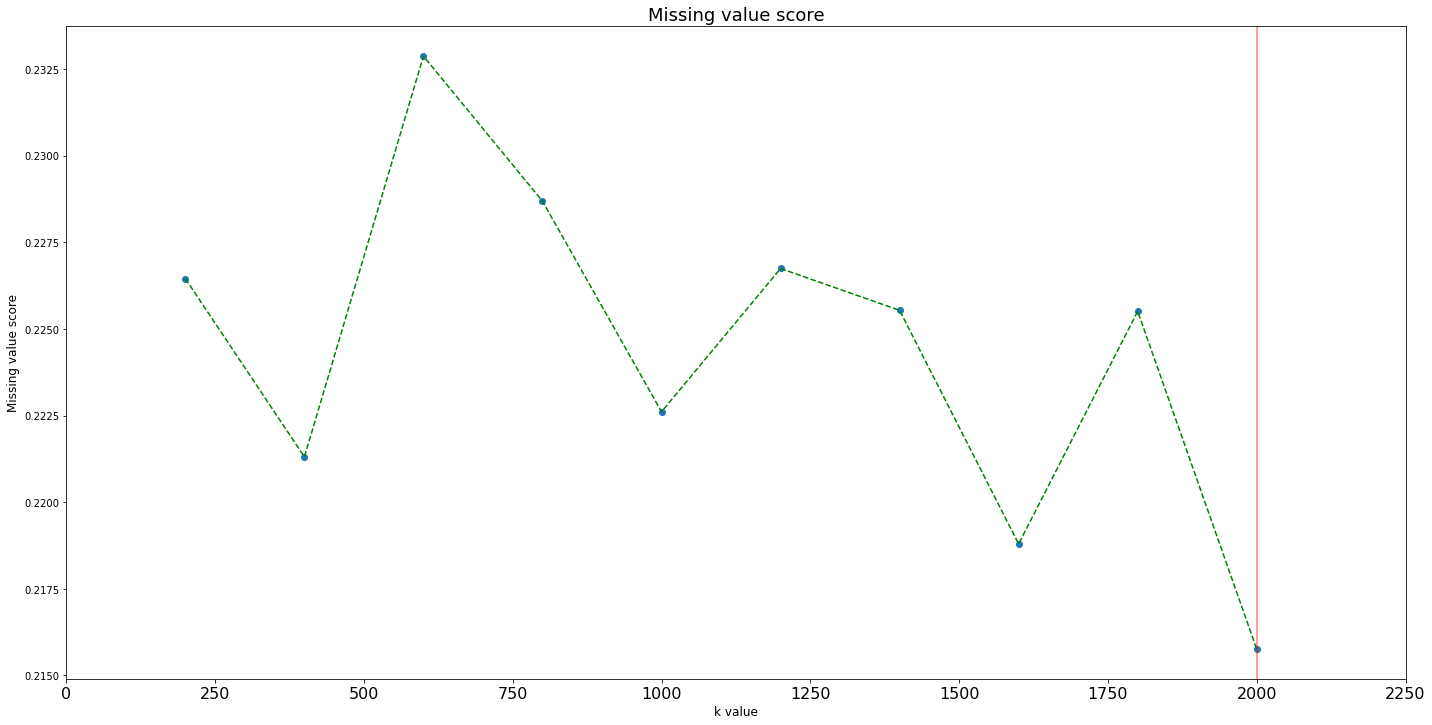

In [15]:
my = [1 - i[0] for i in lst_e_score_l2]; mx = lst_e
plt.subplots(figsize=(24, 12))
plt.title('Missing value score', fontsize = 18)
plt.plot(mx, my, '--', color = 'green')
plt.scatter(mx, my)
plt.xlabel('k value', fontsize = 12)
plt.xticks(list(plt.xticks()[0]), fontsize = 16)
plt.ylabel('Missing value score', fontsize = 12)
plt.axvline(mx[my.index(min(my))], color = 'red', alpha = 0.5)
plt.show()

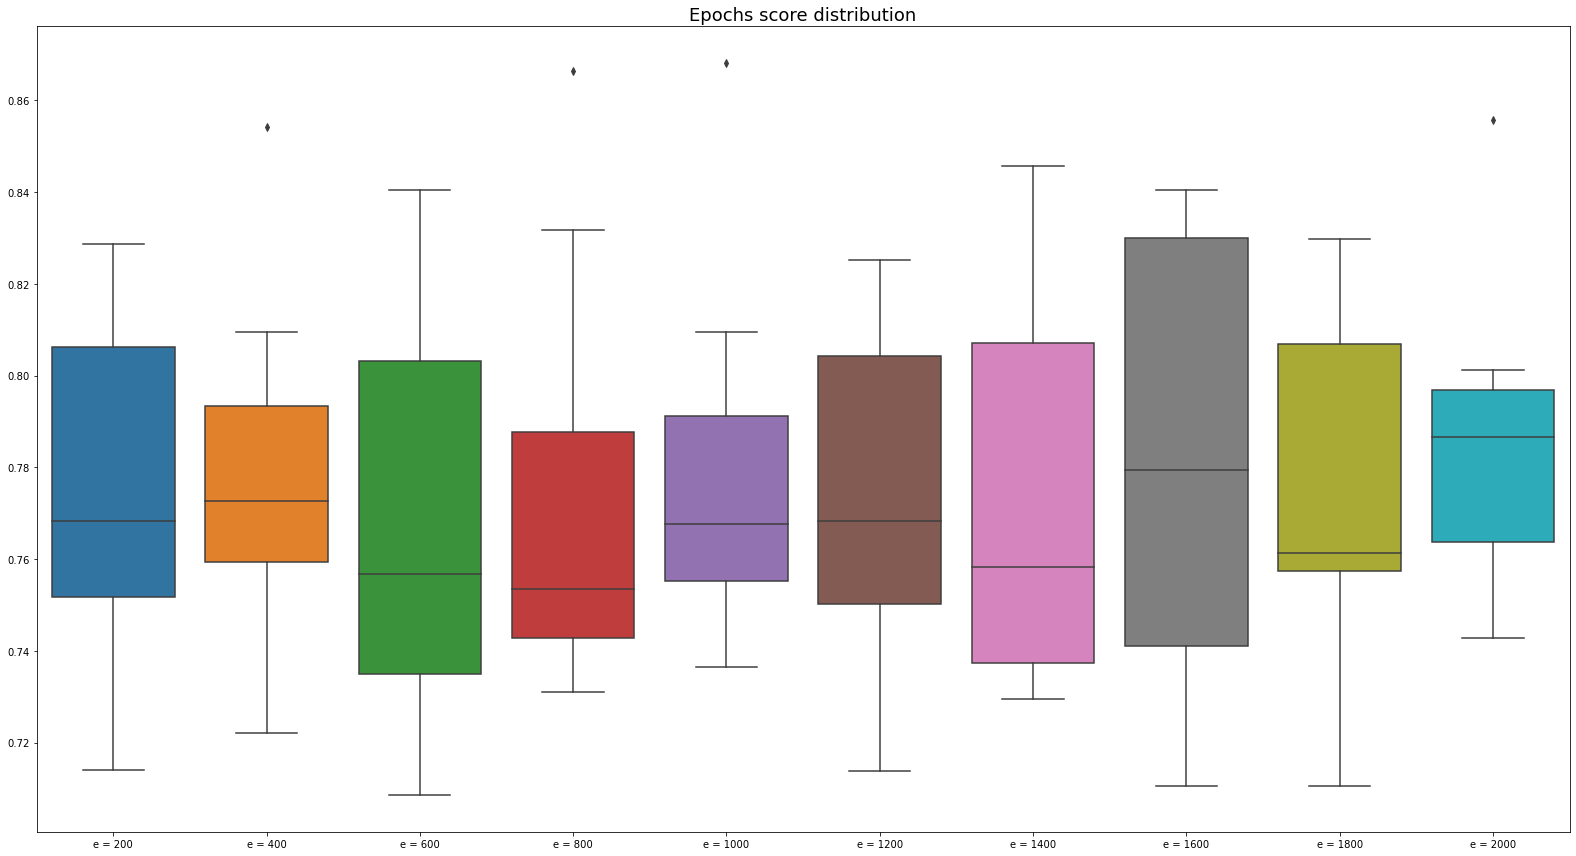

In [16]:
df_mlp_score = pd.DataFrame(dict_score_win)
e_ref = mx[my.index(min(my))]
plt.subplots(figsize=(22, 12))
df_e_sig = df_mlp_score
plt.title('Epochs score distribution', fontsize=18)
sns.boxplot(data=df_e_sig, meanprops = {'marker': '^', 'markerfacecolor': 'white', 'markeredgecolor': 'black', 'markersize': 15})
plt.tight_layout()
plt.show()

### Choosing the best $e$ (epochs)
_______________________________________________
Looking at the distributions, we have a possible statistical difference between the epoch-scores. To make sure of this, we used the Kruskal-Wallis test between groups

In [17]:
from scipy.stats.mstats import kruskal
kw_all = kruskal([df_e_sig['e = %d'%e].values for e in lst_e])
print('# P-value between all groups: {}'. format(round(kw_all[1], 2)))

# P-value between all groups: 0.99


Therefore, we can declare a range of the best values for the epochs. Then:

In [18]:
range_best_e = lst_e
print('{} ≤ epoch ≤ {}'.format(range_best_e[0], range_best_e[-1]))

200 ≤ epoch ≤ 2000


## Comparing scores
_____________________________________________
After EDA and choice of parameters, we will apply cross-validate again and compare the results between the algorithms.

In [19]:
MLP = MLPClassifier(hidden_layer_sizes = (9,3), max_iter = e_ref)
knn = KNeighborsClassifier(n_neighbors = k_ref)
dict_alg = {'MLP': cross_val_score(MLP, Xs, y, cv = kfold_e, scoring = 'f1_macro'), 'k-NN': cross_val_score(knn, X, y, cv = kfold_k, scoring = 'f1_macro')}
df_alg = pd.DataFrame(dict_alg); df_alg

,MLP,k-NN
0,0.826784,0.666062
1,0.829860,0.632278
2,0.744117,0.590869
3,0.728953,0.678442
4,0.783913,0.756014
5,0.804325,0.616694
6,0.753043,0.571892
7,0.736549,0.660435
8,0.825123,0.685284
9,0.779699,0.739927


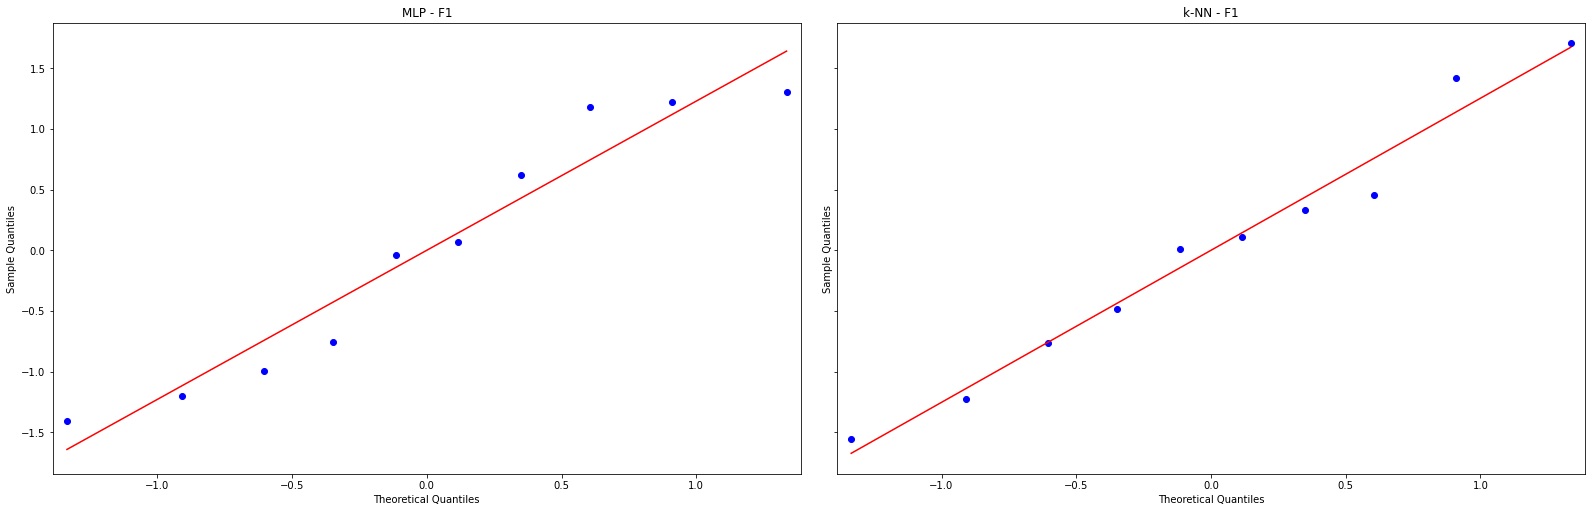

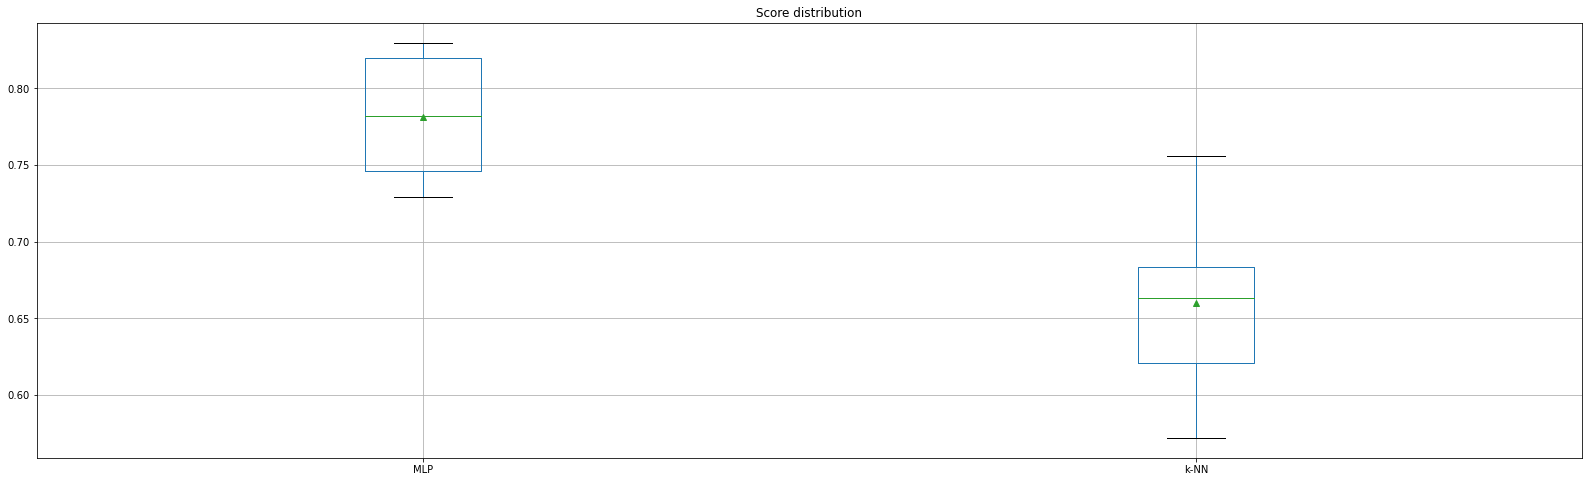

In [20]:
from scipy.stats.mstats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot # Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution

fig, ax = plt.subplots(1, 2, figsize=(22, 7), sharey=True, constrained_layout=True)

qqplot(df_alg['MLP'], fit=True, line="r", ax=ax[0])
ax[0].title.set_text('MLP - F1')
qqplot(df_alg['k-NN'], fit=True, line="r", ax=ax[1])
ax[1].title.set_text('k-NN - F1')

df_alg.plot.box(showmeans=True, figsize=(27.7, 8), title='Score distribution', grid=True)
plt.show()

We applied the Wilcoxon test with rank sum test for unpaired results. So we have to use TSoPW - sum of unpaired ranks/data.

In [21]:
wm = mannwhitneyu(df_alg['MLP'], df_alg['k-NN'])
print('# P-value between all groups: {}'. format(round(wm[1], 4)))

# P-value between all groups: 0.001


So we have a statistically significant difference between the two algorithms. So, analyzing the boxplot, we can see that the MLP was the one that got the best score.

`MLP = MLPClassifier(hidden_layer_sizes = (9,3), max_iter = 2000)` **[the best model]**

# Bibliography

ALI, M. et al. Semantic-k-NN algorithm: an enhanced version of traditional k-NN algorithm. **Expert Systems with Applications**, v. 151, p. 113374, 2020.

DEMŠAR, J. Statistical comparisons of classifiers over multiple data sets. **Journal of Machine Learning Research**, 7, 1-30, 2006.

GARCÍA, S.; HERRERA, F.; DERRAC, J. **Un Tutorial Metodológico para hacer Comparaciones Estadísticas con Tests No Paramétricos en Propuestas de Minería de Datos**, 2010.

GARCÍA, S.; FERNÁNDEZ, A.; LUENGO, J.; HERRERA, F. Advanced nonparametric tests for multiple comparisons in the design of experiments in computational intelligence and data mining: Experimental analysis of power. **Information Sciences**, 180, 2044-2064, 2010.

ROIGER, Richard J. **Data mining**: a tutorial-based primer. Chapman and Hall/CRC, 2017.

SKTLEARN. **Neural network models (supervised)**. Available in: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips . Access in: 25 Oct. 2021.
